## Installing Dependencies

In [1]:
# Install PaddleOCR and necessary dependencies
!pip install paddleocr==2.7.3 paddlepaddle-gpu==2.6.0

import os
import json
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from paddleocr import PaddleOCR

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.8/749.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.6 MB/s eta 0:00:00
   ━

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Initializig Our Paddle OCR Model

In [3]:
# Define paths
image_folder = '/content/drive/MyDrive/Images'  # Folder with full images
cropped_image_folder = '/content/drive/MyDrive/crop_img'  # Folder to save cropped images
annotation_file = '/content/drive/MyDrive/Label.txt'  # Annotation file
output_folder = '/content/drive/MyDrive/evaluation_results/'  # For saving results
os.makedirs(output_folder, exist_ok=True)

# Initialize OCR model (You can use the fine-tuned models here)
det_model_path = '/content/PaddleOCR/outputs/det_inference'
rec_model_path = '/content/PaddleOCR/outputs/rec_inference'
ocr = PaddleOCR(det_model_dir=det_model_path, rec_model_dir=rec_model_path, lang='en', use_angle_cls=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /content/PaddleOCR/outputs/det_inference/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 248kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /content/PaddleOCR/outputs/rec_inference/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:19<00:00, 524kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 149kiB/s]

[2024/12/18 13:40:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/content/PaddleOCR/outputs/det_inference', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/content/PaddleOCR/outputs/rec_inference', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local/lib/pyth

In [4]:
# Initialize OCR with angle classifier
ocr = PaddleOCR(det_model_dir=det_model_path, rec_model_dir=rec_model_path, use_angle_cls=True, lang='en')

[2024/12/18 13:41:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/content/PaddleOCR/outputs/det_inference', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/content/PaddleOCR/outputs/rec_inference', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local/lib/pyth

In [5]:
def evaluate_model(ocr_model, image_folder, annotation_file):
    with open(annotation_file, 'r') as file:
        annotations = file.readlines()

    detection_results = []
    recognition_results = []

    for idx, line in enumerate(annotations):
        image_path, annotation_json = line.strip().split("\t")
        image_path = os.path.join(image_folder, os.path.basename(image_path))

        # Load image
        image = Image.open(image_path)

        # Perform OCR on the image
        results = ocr_model.ocr(image_path)

        # Separate Detection & Recognition Results
        detected_texts = [result[1][0] for result in results[0]]
        recognition_confidence = [result[1][1] for result in results[0]]

        detection_results.append({"image": image_path, "detection": results[0]})
        recognition_results.append({"image": image_path, "texts": detected_texts, "confidence": recognition_confidence})

    # Save detection results
    with open(os.path.join(output_folder, 'detection_results.json'), 'w') as det_file:
        json.dump(detection_results, det_file, indent=4)

    # Save recognition results
    with open(os.path.join(output_folder, 'recognition_results.json'), 'w') as rec_file:
        json.dump(recognition_results, rec_file, indent=4)

    return detection_results, recognition_results

detection_results, recognition_results = evaluate_model(ocr, image_folder, annotation_file)
print("Evaluation completed.")

[2024/12/18 13:41:49] ppocr DEBUG: dt_boxes num : 42, elapsed : 1.811436653137207
[2024/12/18 13:41:49] ppocr DEBUG: cls num  : 42, elapsed : 0.19533300399780273
[2024/12/18 13:41:49] ppocr DEBUG: rec_res num  : 42, elapsed : 0.40049147605895996
[2024/12/18 13:41:50] ppocr DEBUG: dt_boxes num : 38, elapsed : 0.05341053009033203
[2024/12/18 13:41:50] ppocr DEBUG: cls num  : 38, elapsed : 0.0544276237487793
[2024/12/18 13:41:50] ppocr DEBUG: rec_res num  : 38, elapsed : 0.17674517631530762
[2024/12/18 13:41:51] ppocr DEBUG: dt_boxes num : 153, elapsed : 0.08224773406982422
[2024/12/18 13:41:51] ppocr DEBUG: cls num  : 153, elapsed : 0.17789602279663086
[2024/12/18 13:41:51] ppocr DEBUG: rec_res num  : 153, elapsed : 0.5132513046264648
[2024/12/18 13:41:52] ppocr DEBUG: dt_boxes num : 126, elapsed : 0.0839998722076416
[2024/12/18 13:41:52] ppocr DEBUG: cls num  : 126, elapsed : 0.13640379905700684
[2024/12/18 13:41:52] ppocr DEBUG: rec_res num  : 126, elapsed : 0.42960643768310547
[2024/1

In [6]:
!head /content/drive/MyDrive/evaluation_results/detection_results.json

[
    {
        "image": "/content/drive/MyDrive/Images/0-IAq28e_Transcript_page-0001.jpg",
        "detection": [
            [
                [
                    [
                        331.0,
                        160.0
                    ],


In [7]:
!head /content/drive/MyDrive/evaluation_results/recognition_results.json

[
    {
        "image": "/content/drive/MyDrive/Images/0-IAq28e_Transcript_page-0001.jpg",
        "texts": [
            "WWW.WES.ORG",
            "WES",
            "P.O. Box 5087, Bowling Green Station",
            "New York, NY 10274-5087",
            "U.S.A",
            "WORLD EDUCATION SERVICES",


In [8]:
# Path to the ground truth annotations file (same format as the one you used before)
ground_truth_file = '/content/drive/MyDrive/Label.txt'

# Initialize a dictionary to store ground truth
ground_truth = {}

# Load ground truth data from the annotation file
with open(ground_truth_file, 'r') as f:
    lines = f.readlines()

# Parse each line (similar to how you handle the predictions)
for line in lines:
    image_path, annotations_json = line.strip().split("\t")
    annotations = json.loads(annotations_json)

    # Store bounding boxes and transcription in the ground_truth dictionary
    ground_truth[image_path] = {
        "boxes": [ann['points'] for ann in annotations],  # List of bounding boxes
        "transcriptions": [ann['transcription'] for ann in annotations]  # List of text strings
    }

print("Ground truth loaded successfully.")

Ground truth loaded successfully.


# Evaluating Detection Model

In [9]:
# Check the filenames in detection_results
print("Sample filenames in detection_results:")
for pred in detection_results[:5]:  # Print first 5 image paths
    print(os.path.basename(pred['image']))

# Check the keys in ground_truth
print("\nSample filenames in ground_truth:")
for key in list(ground_truth.keys())[:5]:  # Print first 5 keys from ground truth
    print(key)

Sample filenames in detection_results:
0-IAq28e_Transcript_page-0001.jpg
0-IAq28e_Transcript_page-0002.jpg
0-IAq28e_Transcript_page-0003.jpg
0-IAq28e_Transcript_page-0004.jpg
0-IAq28e_Transcript_page-0005.jpg

Sample filenames in ground_truth:
Images/0-IAq28e_Transcript_page-0001.jpg
Images/0-IAq28e_Transcript_page-0002.jpg
Images/0-IAq28e_Transcript_page-0003.jpg
Images/0-IAq28e_Transcript_page-0004.jpg
Images/0-IAq28e_Transcript_page-0005.jpg


In [10]:
from shapely.geometry import Polygon
import os

def iou(boxA, boxB):
    polyA = Polygon(boxA)
    polyB = Polygon(boxB)

    intersection = polyA.intersection(polyB).area
    union = polyA.union(polyB).area

    return intersection / union

# Normalize filenames by stripping the folder name (if necessary)
def normalize_filename(filename):
    return os.path.basename(filename)  # This will remove any folder path

# Normalize ground truth keys
normalized_ground_truth = {normalize_filename(key): value for key, value in ground_truth.items()}

# Modify detection_results to use normalized filenames
def evaluate_detection(detection_results, ground_truth, iou_threshold=0.5):
    total_true_positive = 0
    total_false_positive = 0
    total_false_negative = 0
    skipped_images = 0

    for pred in detection_results:
        # Extract and normalize the filename (without the full path)
        image_filename = normalize_filename(pred['image'])

        # Check if the normalized image exists in ground truth
        if image_filename not in ground_truth:
            print(f"Warning: Ground truth not found for image {image_filename}")
            skipped_images += 1
            continue

        pred_boxes = [r[0] for r in pred['detection']]
        gt_boxes = ground_truth[image_filename]["boxes"]  # Ground truth for the same image

        # Count True Positives, False Positives, False Negatives
        matched_gt_boxes = []
        for pred_box in pred_boxes:
            match_found = False
            for gt_box in gt_boxes:
                if iou(pred_box, gt_box) >= iou_threshold:
                    matched_gt_boxes.append(gt_box)
                    match_found = True
                    break
            if match_found:
                total_true_positive += 1
            else:
                total_false_positive += 1

        total_false_negative += len(gt_boxes) - len(matched_gt_boxes)

    # Avoid division by zero for precision, recall, and F1-score
    precision = total_true_positive / (total_true_positive + total_false_positive) if (total_true_positive + total_false_positive) > 0 else 0
    recall = total_true_positive / (total_true_positive + total_false_negative) if (total_true_positive + total_false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Skipped {skipped_images} images due to missing ground truth.")

    return precision, recall, f1_score

# Now run the evaluation with normalized filenames
precision, recall, f1_score = evaluate_detection(detection_results, normalized_ground_truth)
print(f"Detection Model - Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}")

Skipped 0 images due to missing ground truth.
Detection Model - Precision: 1.0, Recall: 1.0, F1-Score: 1.0


# Evaluating Recognition Model

In [11]:
import os

# Check the filenames in recognition_results
print("Sample filenames in recognition_results:")
for pred in recognition_results[:5]:  # Print first 5 image paths
    print(os.path.basename(pred['image']))  # Extracts only the filename from the path

# Check the keys in ground_truth
print("\nSample filenames in ground_truth:")
for key in list(ground_truth.keys())[:5]:  # Print first 5 keys from ground truth
    print(key)


Sample filenames in recognition_results:
0-IAq28e_Transcript_page-0001.jpg
0-IAq28e_Transcript_page-0002.jpg
0-IAq28e_Transcript_page-0003.jpg
0-IAq28e_Transcript_page-0004.jpg
0-IAq28e_Transcript_page-0005.jpg

Sample filenames in ground_truth:
Images/0-IAq28e_Transcript_page-0001.jpg
Images/0-IAq28e_Transcript_page-0002.jpg
Images/0-IAq28e_Transcript_page-0003.jpg
Images/0-IAq28e_Transcript_page-0004.jpg
Images/0-IAq28e_Transcript_page-0005.jpg


In [13]:
def evaluate_recognition(recognition_results, ground_truth):
    total_true_positive = 0  # Count of correct text matches
    total_false_positive = 0  # Count of predicted texts that are incorrect
    total_false_negative = 0  # Count of missed ground truth texts
    skipped_images = 0  # Images skipped due to missing ground truth

    for pred in recognition_results:
        # Extract and normalize the filename (without the full path)
        image_filename = normalize_filename(pred['image'])

        # Check if the normalized image exists in ground truth
        if image_filename not in ground_truth:
            print(f"Warning: Ground truth not found for image {image_filename}")
            skipped_images += 1
            continue

        # Extract predicted text and ground truth text
        predicted_text = pred.get('text', '').strip()  # Predicted text (default to empty string if missing)

        # Adjust ground truth extraction based on its structure
        ground_truth_entry = ground_truth[image_filename]
        if isinstance(ground_truth_entry, dict):
            ground_truth_text = ground_truth_entry.get('text', '').strip()
        elif isinstance(ground_truth_entry, str):
            ground_truth_text = ground_truth_entry.strip()
        else:
            print(f"Unexpected ground truth format for {image_filename}: {ground_truth_entry}")
            skipped_images += 1
            continue

        # Count metrics based on text comparison
        if predicted_text == ground_truth_text:
            total_true_positive += 1
        else:
            total_false_positive += 1
            total_false_negative += 1

    # Avoid division by zero for precision, recall, and F1-score
    precision = total_true_positive / (total_true_positive + total_false_positive) if (total_true_positive + total_false_positive) > 0 else 0
    recall = total_true_positive / (total_true_positive + total_false_negative) if (total_true_positive + total_false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Skipped {skipped_images} images due to missing or malformed ground truth.")

    return precision, recall, f1_score


In [14]:
# Run the recognition evaluation
precision, recall, f1_score = evaluate_recognition(recognition_results, normalized_ground_truth)

# Print the results
print("\nRecognition Model Evaluation:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


Skipped 0 images due to missing or malformed ground truth.

Recognition Model Evaluation:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


# Vizualizing Good Samples and Bad Samples

In [16]:
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.9 MB/s eta 0:00:00


Visualizing Good Samples:


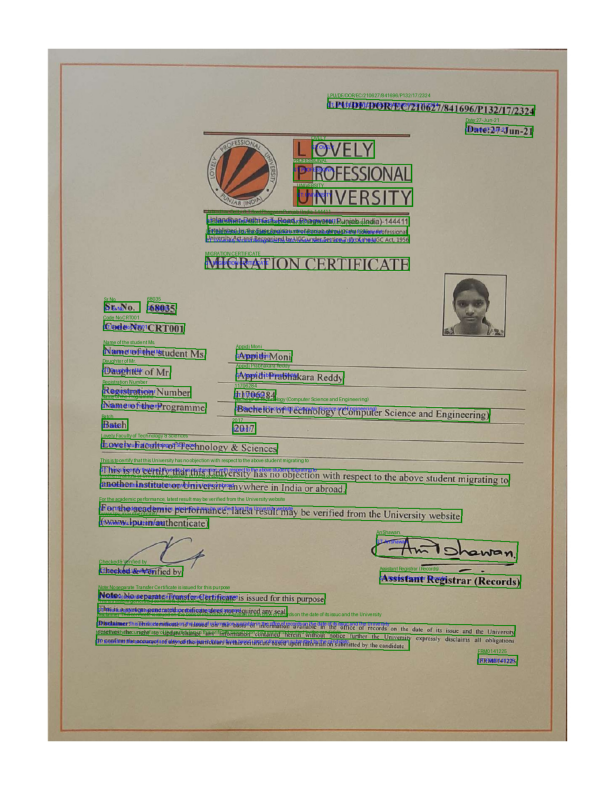

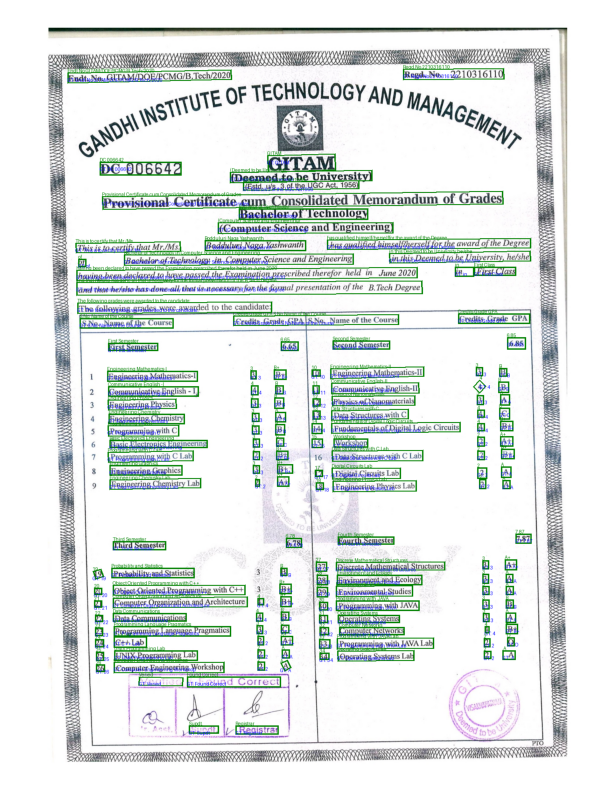

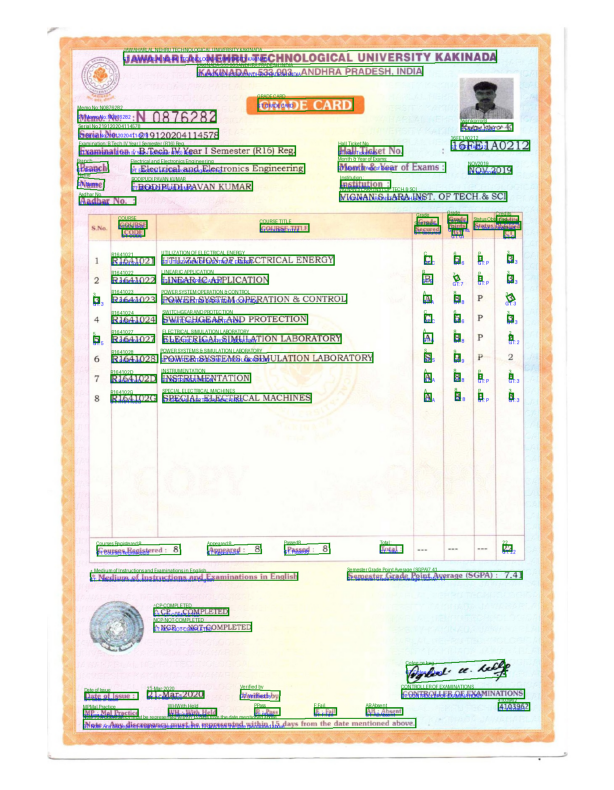

Visualizing Bad Samples:


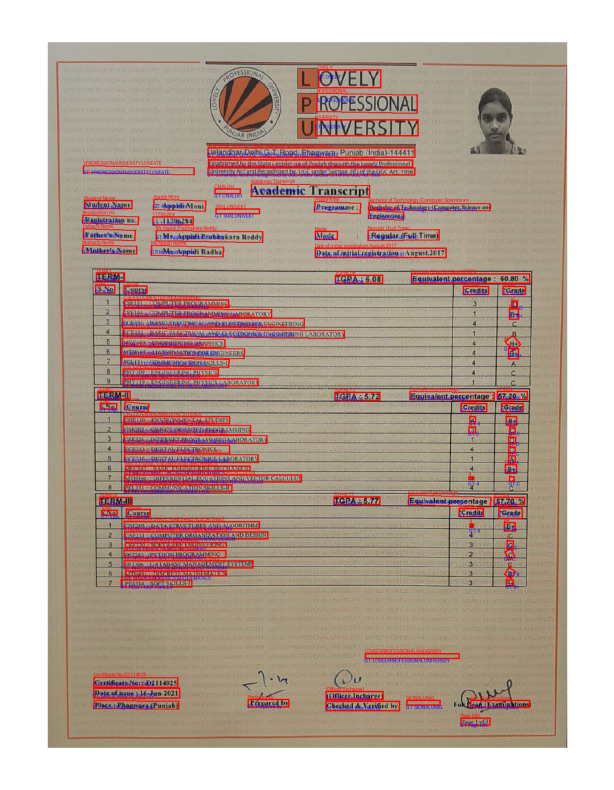

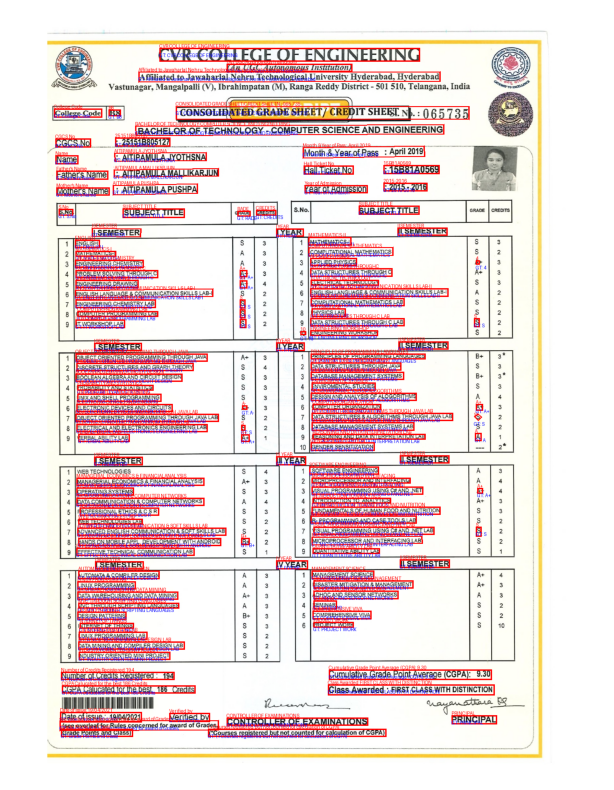

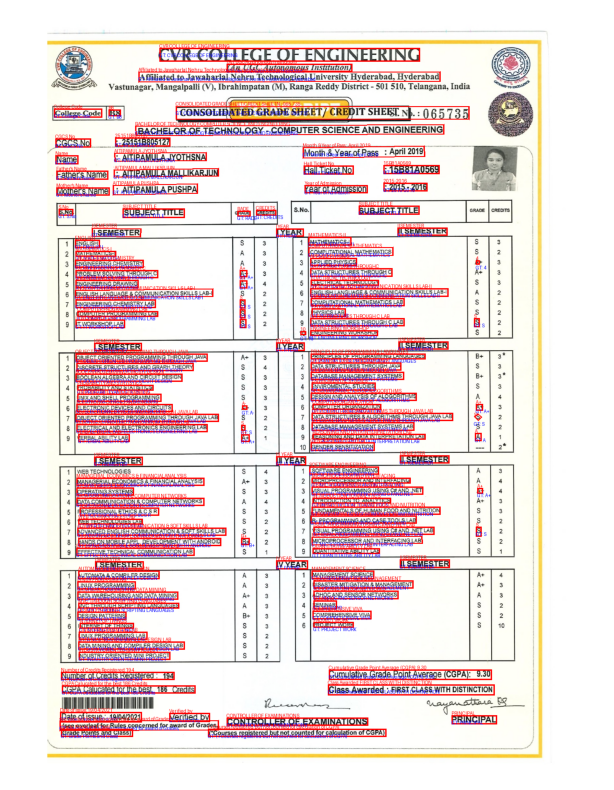

In [17]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random
import Levenshtein
import os


# Function to ensure bounding box coordinates are in proper format (integers)
def convert_box_to_int(box):
    return [(int(x), int(y)) for x, y in box]

# Function to draw bounding boxes and recognized text on an image
def draw_boxes_with_text(image_path, detection_result, recognition_texts, gt_texts=None, is_good=True):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    font = ImageFont.load_default()  # Default font for drawing text

    # Log mismatch issues for debugging
    if len(detection_result) != len(recognition_texts):
        print(f"Warning: Mismatch between detection and recognition counts in {image_path}")
    if gt_texts and len(gt_texts) != len(recognition_texts):
        print(f"Warning: Mismatch between ground truth and recognition counts in {image_path}")

    # Limit the iteration to the smaller of the detection or recognition text lengths to prevent index errors
    for idx in range(min(len(detection_result), len(recognition_texts))):
        box = convert_box_to_int(detection_result[idx][0])  # Convert the bounding box coordinates to integers
        pred_text = recognition_texts[idx]  # Recognized text
        gt_text = gt_texts[idx] if gt_texts and idx < len(gt_texts) else None  # Ground truth text if available

        # Draw the bounding box
        draw.polygon(box, outline="green" if is_good else "red", width=3)

        # Draw the recognized text
        draw.text((box[0][0], box[0][1] - 10), pred_text, fill="green" if is_good else "red", font=font)

        # If ground truth is provided, show the difference
        if gt_text:
            draw.text((box[0][0], box[0][1] + 10), f"GT: {gt_text}", fill="blue", font=font)

    return image

# Visualize Good Samples (low edit distance or perfect matches)
def visualize_good_samples(detection_results, recognition_results, ground_truth, num_samples=5):
    good_samples = []

    for det_res, rec_res in zip(detection_results, recognition_results):
        image_filename = os.path.basename(rec_res['image'])
        if image_filename in ground_truth:
            gt_texts = ground_truth[image_filename]["transcriptions"]
            pred_texts = rec_res['texts']

            # Check if all texts are correct
            all_correct = all([Levenshtein.distance(pred, gt) == 0 for pred, gt in zip(pred_texts, gt_texts)])

            if all_correct:
                good_samples.append((det_res, rec_res))

    # Randomly select a few good samples to visualize
    if len(good_samples) > 0:
        for i in range(min(num_samples, len(good_samples))):
            det_res, rec_res = random.choice(good_samples)
            image_path = rec_res['image']
            gt_texts = ground_truth[os.path.basename(image_path)]["transcriptions"]
            recognition_texts = rec_res['texts']

            # Draw the bounding boxes with text
            image_with_boxes = draw_boxes_with_text(image_path, det_res['detection'], recognition_texts, gt_texts, is_good=True)

            # Display the image
            plt.figure(figsize=(10, 10))
            plt.imshow(image_with_boxes)
            plt.axis('off')
            plt.show()

# Visualize Bad Samples (high edit distance)
def visualize_bad_samples(detection_results, recognition_results, ground_truth, num_samples=5):
    bad_samples = []

    for det_res, rec_res in zip(detection_results, recognition_results):
        image_filename = os.path.basename(rec_res['image'])
        if image_filename in ground_truth:
            gt_texts = ground_truth[image_filename]["transcriptions"]
            pred_texts = rec_res['texts']

            # Check if any texts are incorrect
            any_incorrect = any([Levenshtein.distance(pred, gt) > 0 for pred, gt in zip(pred_texts, gt_texts)])

            if any_incorrect:
                bad_samples.append((det_res, rec_res))

    # Randomly select a few bad samples to visualize
    if len(bad_samples) > 0:
        for i in range(min(num_samples, len(bad_samples))):
            det_res, rec_res = random.choice(bad_samples)
            image_path = rec_res['image']
            gt_texts = ground_truth[os.path.basename(image_path)]["transcriptions"]
            recognition_texts = rec_res['texts']

            # Draw the bounding boxes with text
            image_with_boxes = draw_boxes_with_text(image_path, det_res['detection'], recognition_texts, gt_texts, is_good=False)

            # Display the image
            plt.figure(figsize=(10, 10))
            plt.imshow(image_with_boxes)
            plt.axis('off')
            plt.show()

# Example usage:
print("Visualizing Good Samples:")
visualize_good_samples(detection_results, recognition_results, normalized_ground_truth, num_samples=3)

print("Visualizing Bad Samples:")
visualize_bad_samples(detection_results, recognition_results, normalized_ground_truth, num_samples=3)

# Perfroming Super Resolution

In [18]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch
import os

# Load the Stable Diffusion Upscaler model
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, variant="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# Define paths
image_folder = '/content/drive/MyDrive/Images'  # Folder with full images
cropped_image_folder = '/content/drive/MyDrive/crop_img'  # Folder to save cropped images
annotation_file = '/content/drive/MyDrive/Label.txt'  # Annotation file
output_folder = '/content/drive/MyDrive/evaluation_results/'  # For saving results
os.makedirs(output_folder, exist_ok=True)

# Function to upscale image
def upscale_image(image_path):
    # Open and prepare the low-resolution image
    low_res_img = Image.open(image_path).convert("RGB")
    low_res_img = low_res_img.resize((128, 128))  # Resize to input size, if necessary

    prompt = "a white cat"  # Adjust the prompt based on the actual content of the image

    # Use the pipeline to upscale the image
    upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
    return upscaled_image

# Process all images in the image folder
for img_filename in os.listdir(image_folder):
    if img_filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_folder, img_filename)
        upscaled_image = upscale_image(img_path)

        # Save the upscaled image
        upscaled_image_path = os.path.join(output_folder, f"upscaled_{img_filename}")
        upscaled_image.save(upscaled_image_path)
        print(f"Upscaled image saved to: {upscaled_image_path}")

# Continue with your OCR process using upscaled images


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

low_res_scheduler/scheduler_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/982 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/947M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/111M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0-IAq28e_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0-IAq28e_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0-IAq28e_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0AvomCee_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0AvomCee_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0-IAq28e_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0AvomCee_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0UKOVRiE_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0-IAq28e_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_0wgdET97_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1lZG_P8Q_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1blZdXbv_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1qq3zMTT_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0014.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0016.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0011.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1qq3zMTT_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1Lzrrnhb_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0015.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0013.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1Lzrrnhb_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1nPNv-2f_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1nPNv-2f_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0012.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_1pQYpK5z_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2dM-bpEE_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2dM-bpEE_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2L3tEs2x_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2iPtT1R2_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2o9RgsnA_Transcript_page-0011.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_2rr-Sh2a_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images3_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0015.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0013.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images5_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0014.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images5_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images5_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0011.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images5_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0012.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled_images4_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0012.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0011.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0008.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__O_nbhma_Transcript_page-0001.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0003.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0004.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0009.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0010.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0006.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0005.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__O_nbhma_Transcript_page-0002.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0007.jpg


  0%|          | 0/75 [00:00<?, ?it/s]

Upscaled image saved to: /content/drive/MyDrive/evaluation_results/upscaled__0yr2Fyo_Transcript_page-0001.jpg
